In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
fire = pd.read_csv('forestfires.csv')

In [3]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
fire.month.unique

<bound method Series.unique of 0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object>

In [5]:
dummy = pd.get_dummies(fire['day'])    
fire = pd.concat([fire,dummy],axis=1)   

In [6]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthoct,monthsep,size_category,fri,mon,sat,sun,thu,tue,wed
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,small,1,0,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,small,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,small,0,0,1,0,0,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,small,1,0,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,small,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,large,0,0,0,1,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,large,0,0,0,1,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,large,0,0,0,1,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,small,0,0,1,0,0,0,0


In [7]:
dummy = pd.get_dummies(fire['size_category'])    
fire = pd.concat([fire,dummy],axis=1)  

In [8]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,size_category,fri,mon,sat,sun,thu,tue,wed,large,small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,small,1,0,0,0,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,small,0,0,0,0,0,1,0,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,small,0,0,1,0,0,0,0,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,small,1,0,0,0,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,small,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,large,0,0,0,1,0,0,0,1,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,large,0,0,0,1,0,0,0,1,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,large,0,0,0,1,0,0,0,1,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,small,0,0,1,0,0,0,0,0,1


In [9]:
## Dropping the categorical columns after creating their dummy variables
fire = fire.drop(['day', 'size_category','month'],axis=1)

In [10]:
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthsep,fri,mon,sat,sun,thu,tue,wed,large,small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,1,0,0,0,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,1,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,1,0,0,0,1,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,1,0,0,0,1,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,1,0,0,0,1,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [12]:
column_names = list(fire.columns)
predictors = column_names[0:36]
target = column_names[36]

In [16]:
first_model = prep_model([36,50,1])
first_model.fit(np.array(fire[predictors]),np.array(fire[target]),epochs=500)
pred_train = first_model.predict(np.array(fire[predictors]))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-fire[target])**2))
print('RMSE Value is : ', rmse_value)

Epoch 1/500
517/517 [==============================] - 0s 499us/step - loss: 170.3739 - accuracy: 0.0232
Epoch 2/500
517/517 [==============================] - 0s 91us/step - loss: 26.6319 - accuracy: 0.0928
Epoch 3/500
517/517 [==============================] - 0s 75us/step - loss: 6.6857 - accuracy: 0.1644
Epoch 4/500
517/517 [==============================] - 0s 84us/step - loss: 1.7065 - accuracy: 0.2843
Epoch 5/500
517/517 [==============================] - 0s 89us/step - loss: 0.9611 - accuracy: 0.3830
Epoch 6/500
517/517 [==============================] - 0s 78us/step - loss: 0.6814 - accuracy: 0.4855
Epoch 7/500
517/517 [==============================] - 0s 73us/step - loss: 0.5029 - accuracy: 0.5358
Epoch 8/500
517/517 [==============================] - 0s 57us/step - loss: 0.4191 - accuracy: 0.5919
Epoch 9/500
517/517 [==============================] - 0s 66us/step - loss: 0.3512 - accuracy: 0.6364
Epoch 10/500
517/517 [==============================] - 0s 52us/step - loss: 0

517/517 [==============================] - 0s 56us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 81/500
517/517 [==============================] - 0s 41us/step - loss: 0.0140 - accuracy: 1.0000
Epoch 82/500
517/517 [==============================] - 0s 65us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 83/500
517/517 [==============================] - 0s 56us/step - loss: 0.0114 - accuracy: 1.0000
Epoch 84/500
517/517 [==============================] - 0s 67us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 85/500
517/517 [==============================] - 0s 73us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 86/500
517/517 [==============================] - 0s 65us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 87/500
517/517 [==============================] - 0s 69us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 88/500
517/517 [==============================] - 0s 68us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 89/500
517/517 [==============================] - 0s 71us/step - loss: 0.0095 - 

517/517 [==============================] - 0s 65us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 160/500
517/517 [==============================] - 0s 68us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 161/500
517/517 [==============================] - 0s 75us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 162/500
517/517 [==============================] - 0s 58us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 163/500
517/517 [==============================] - 0s 66us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 164/500
517/517 [==============================] - 0s 62us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 165/500
517/517 [==============================] - 0s 51us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 166/500
517/517 [==============================] - 0s 54us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 167/500
517/517 [==============================] - 0s 44us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 168/500
517/517 [==============================] - 0s 67us/step - loss: 

517/517 [==============================] - 0s 48us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 238/500
517/517 [==============================] - 0s 40us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 239/500
517/517 [==============================] - 0s 50us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 240/500
517/517 [==============================] - 0s 66us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 241/500
517/517 [==============================] - 0s 73us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 242/500
517/517 [==============================] - 0s 68us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 243/500
517/517 [==============================] - 0s 75us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 244/500
517/517 [==============================] - 0s 73us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 245/500
517/517 [==============================] - 0s 67us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 246/500
517/517 [==============================] - 0s 76us/step - loss: 

517/517 [==============================] - 0s 60us/step - loss: 1.2756 - accuracy: 0.5455
Epoch 316/500
517/517 [==============================] - ETA: 0s - loss: 2.8757 - accuracy: 0.09 - 0s 39us/step - loss: 1.8447 - accuracy: 0.4952
Epoch 317/500
517/517 [==============================] - 0s 41us/step - loss: 1.6295 - accuracy: 0.7157
Epoch 318/500
517/517 [==============================] - 0s 64us/step - loss: 1.2187 - accuracy: 0.5068
Epoch 319/500
517/517 [==============================] - 0s 74us/step - loss: 0.2694 - accuracy: 0.7253
Epoch 320/500
517/517 [==============================] - 0s 66us/step - loss: 0.5453 - accuracy: 0.8066
Epoch 321/500
517/517 [==============================] - 0s 69us/step - loss: 0.7570 - accuracy: 0.7892
Epoch 322/500
517/517 [==============================] - 0s 73us/step - loss: 1.1778 - accuracy: 0.3675
Epoch 323/500
517/517 [==============================] - 0s 64us/step - loss: 0.4847 - accuracy: 0.4971
Epoch 324/500
517/517 [=============

517/517 [==============================] - 0s 54us/step - loss: 2.2097 - accuracy: 0.3888
Epoch 394/500
517/517 [==============================] - 0s 66us/step - loss: 1.8607 - accuracy: 0.6112
Epoch 395/500
517/517 [==============================] - 0s 67us/step - loss: 0.8676 - accuracy: 0.6692
Epoch 396/500
517/517 [==============================] - 0s 71us/step - loss: 0.4969 - accuracy: 0.5919
Epoch 397/500
517/517 [==============================] - 0s 68us/step - loss: 0.1135 - accuracy: 0.9729
Epoch 398/500
517/517 [==============================] - 0s 74us/step - loss: 0.0393 - accuracy: 0.9961
Epoch 399/500
517/517 [==============================] - 0s 87us/step - loss: 0.0218 - accuracy: 0.9961
Epoch 400/500
517/517 [==============================] - 0s 66us/step - loss: 0.0145 - accuracy: 0.9961
Epoch 401/500
517/517 [==============================] - 0s 66us/step - loss: 0.0142 - accuracy: 0.9981
Epoch 402/500
517/517 [==============================] - 0s 67us/step - loss: 

517/517 [==============================] - 0s 54us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 472/500
517/517 [==============================] - 0s 39us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 473/500
517/517 [==============================] - 0s 60us/step - loss: 0.0028 - accuracy: 0.9981
Epoch 474/500
517/517 [==============================] - 0s 66us/step - loss: 0.0053 - accuracy: 0.9981
Epoch 475/500
517/517 [==============================] - 0s 73us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 476/500
517/517 [==============================] - 0s 77us/step - loss: 0.0034 - accuracy: 0.9981
Epoch 477/500
517/517 [==============================] - 0s 71us/step - loss: 0.0097 - accuracy: 0.9961
Epoch 478/500
517/517 [==============================] - 0s 68us/step - loss: 0.0214 - accuracy: 0.9961
Epoch 479/500
517/517 [==============================] - 0s 65us/step - loss: 0.0730 - accuracy: 0.9903
Epoch 480/500
517/517 [==============================] - 0s 67us/step - loss: 

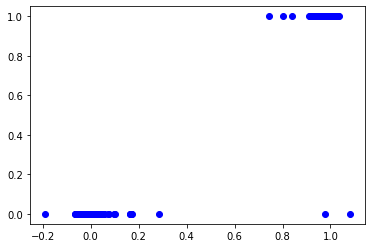

array([[1.       , 0.9853076],
       [0.9853076, 1.       ]])

In [18]:
import matplotlib.pyplot as plt
plt.plot(pred_train,fire[target],"bo")
plt.show()
np.corrcoef(pred_train,fire[target]) # we got high correlation 98%